In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
# Load the IMDB dataset
max_features = 10000  # Number of most frequent words to consider
max_len = 100         # Maximum sequence length

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [ ]:
# Model parameters
embedding_dim = 64
gru_units_1 = 64
gru_units_2 = 32

In [ ]:
# Define the model
model = Sequential([
    # Embedding layer
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len),

    # First GRU layer with return_sequences=True
    GRU(units=gru_units_1, return_sequences=True),

    # Second GRU layer with return_sequences=False
    GRU(units=gru_units_2, return_sequences=False),

    # Dense layer for binary classification
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True, verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [ ]:
# Train the model, including the callbacks
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, checkpoint] # Include the callbacks here
)

Epoch 1/10
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7127 - loss: 0.5338
Epoch 1: val_loss improved from inf to 0.35200, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7130 - loss: 0.5335 - val_accuracy: 0.8426 - val_loss: 0.3520
Epoch 2/10
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8894 - loss: 0.2799
Epoch 2: val_loss did not improve from 0.35200
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8894 - loss: 0.2799 - val_accuracy: 0.8546 - val_loss: 0.3604
Epoch 3/10
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9308 - loss: 0.1847
Epoch 3: val_loss did not improve from 0.35200
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9308 - loss: 0.1848 - val_accuracy: 0.8436 - val_loss: 0.3777
Epoch 4/10
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9607 - loss: 0.1172
Epoch 4: val_loss did not improve from 0.35200
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9607 - loss: 0.1173

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8437 - loss: 0.3557
Test Accuracy: 0.85


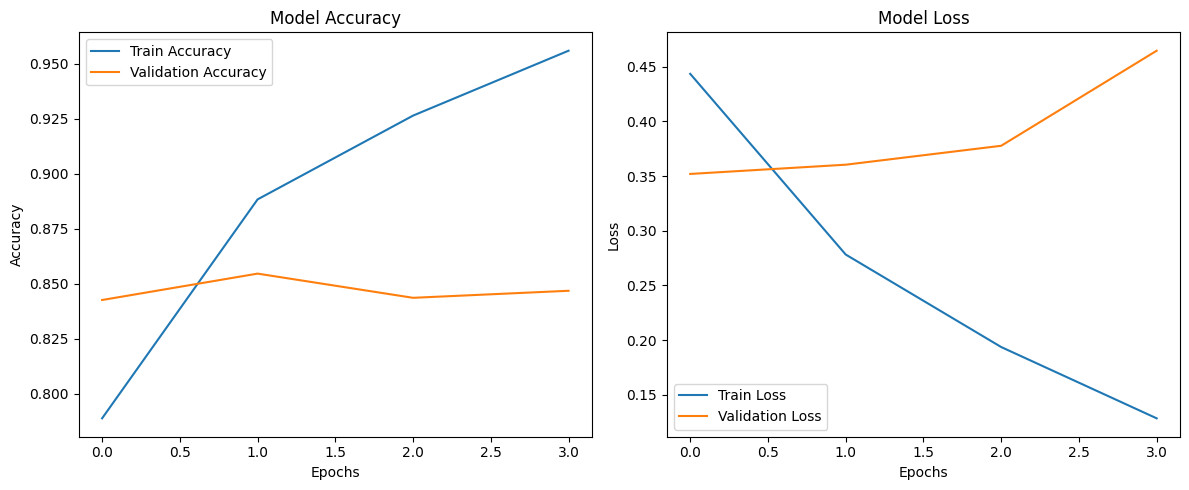

In [ ]:
# Visualize training performance
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_history(history)

In [ ]:
# Load the best model with the correct file extension
best_model = load_model('best_model.keras')

In [ ]:
# Make predictions
def predict_sentiment(review, tokenizer, model, max_len):
    """
    Predicts the sentiment of a given review.

    Args:
        review (str): The review text.
        tokenizer: Tokenizer used to encode the text.
        model: Trained sentiment analysis model.
        max_len (int): Maximum length for padding.

    Returns:
        float: Sentiment score (0 = negative, 1 = positive).
    """
    # Encode the review to word indices
    encoded_review = tokenizer.texts_to_sequences([review])
    # Pad the sequence
    padded_review = pad_sequences(encoded_review, maxlen=max_len)
    # Predict the sentiment
    prediction = model.predict(padded_review)[0][0]
    return prediction

# Example review for prediction
sample_review = "The movie was fantastic! The performances were outstanding and the story was gripping."

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # Import the Tokenizer class from tensorflow.keras.preprocessing.text

# Prepare tokenizer with training data
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(imdb.get_word_index().keys())

In [ ]:
# Predict the sentiment for the sample review
predicted_sentiment = predict_sentiment(sample_review, tokenizer, best_model, max_len)
print(f"Predicted Sentiment Score: {predicted_sentiment:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted Sentiment Score: 0.99


In [ ]:
if predicted_sentiment >= 0.5:
    print("The review is Positive.")
else:
    print("The review is Negative.")

The review is Positive.
